In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cab = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_customer = pd.read_csv("Customer_ID.csv")
df_transacton = pd.read_csv("Transaction_ID.csv")

df_cab["profit per km"] = (df_cab['Price Charged'] - df_cab['Cost of Trip']) / df_cab['KM Travelled']

print(f"Cab_Data.csv: {df_cab.shape}")
print(f"City.csv: {df_city.shape}")
print(f"Customer_ID.csv: {df_customer.shape}")
print(f"Transaction_ID.csv: {df_transacton.shape}")


Cab_Data.csv: (359392, 8)
City.csv: (20, 3)
Customer_ID.csv: (49171, 4)
Transaction_ID.csv: (440098, 3)


In [347]:
merged_df = pd.merge(df_transacton, df_cab, on='Transaction ID', how='left')
merged_df = pd.merge(merged_df, df_customer, on='Customer ID', how='left')
merged_df = pd.merge(merged_df, df_city, on='City', how='left')

merged_df = merged_df.dropna()

merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'], format='%m/%d/%y')
merged_df['Year'] = merged_df['Date of Travel'].dt.year
merged_df['Month'] = merged_df['Date of Travel'].dt.month

merged_df['Gender'] = merged_df['Gender'].replace({'Male': 1, 'Female': 0})
merged_df['Payment_Mode'] = merged_df['Payment_Mode'].replace({'Card': 1, 'Cash': 0})

print(merged_df.head())
print(merged_df.shape)
print(merged_df.columns)

   Transaction ID  Customer ID  Payment_Mode Date of Travel   Company  \
0        10000011        29290             1     2016-01-08  Pink Cab   
1        10000012        27703             1     2016-01-06  Pink Cab   
2        10000013        28712             0     2016-01-02  Pink Cab   
3        10000014        28020             0     2016-01-07  Pink Cab   
4        10000015        27182             1     2016-01-03  Pink Cab   

         City  KM Travelled  Price Charged  Cost of Trip  profit per km  \
0  ATLANTA GA         30.45         370.95       313.635       1.882266   
1  ATLANTA GA         28.62         358.52       334.854       0.826904   
2  ATLANTA GA          9.04         125.20        97.632       3.049558   
3  ATLANTA GA         33.17         377.40       351.602       0.777751   
4  ATLANTA GA          8.73         114.62        97.776       1.929439   

   Gender  Age  Income (USD/Month) Population     Users  Year  Month  
0       1   28               10813   81

Mean Profit per KM

Yellow Cab is more profitable per KM

Year  Company   
2016  Pink Cab      3.026813
      Yellow Cab    7.489847
2017  Pink Cab      2.962883
      Yellow Cab    7.494612
2018  Pink Cab      2.350447
      Yellow Cab    6.364805
Name: profit per km, dtype: float64


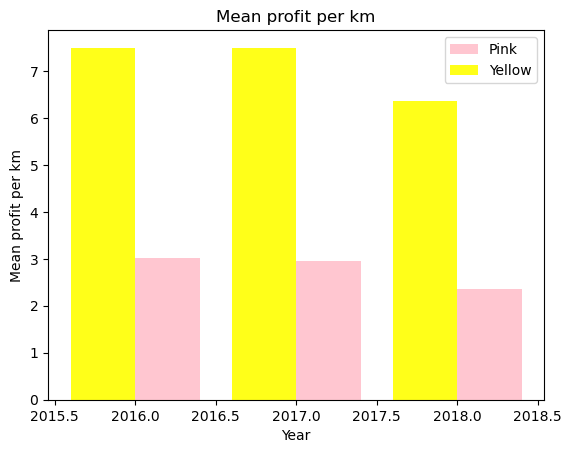

In [348]:
import matplotlib.pyplot as plt
import numpy as np

mean_profit_per_km = merged_df.groupby(['Year', 'Company'])['profit per km'].mean()
print(mean_profit_per_km)

temp = mean_profit_per_km.unstack()
mean_profit_per_km_pink = temp['Pink Cab'].values
mean_profit_per_km_yellow = temp['Yellow Cab'].values

year = np.array([2016, 2017, 2018])
plt.bar(year+0.2, mean_profit_per_km_pink,0.4, alpha=0.9,color='pink', label='Pink')
plt.bar(year-0.2, mean_profit_per_km_yellow,0.4,  alpha=0.9,color='yellow', label='Yellow')
plt.title("Mean profit per km")
plt.xlabel('Year')
plt.ylabel('Mean profit per km')
plt.legend()
plt.show()

Annual Profit

Yellow Cab makes more annual profit than pink

Year  Company   
2016  Pink Cab      1.713511e+06
      Yellow Cab    1.392700e+07
2017  Pink Cab      2.033655e+06
      Yellow Cab    1.657598e+07
2018  Pink Cab      1.560162e+06
      Yellow Cab    1.351740e+07
Name: profit, dtype: float64


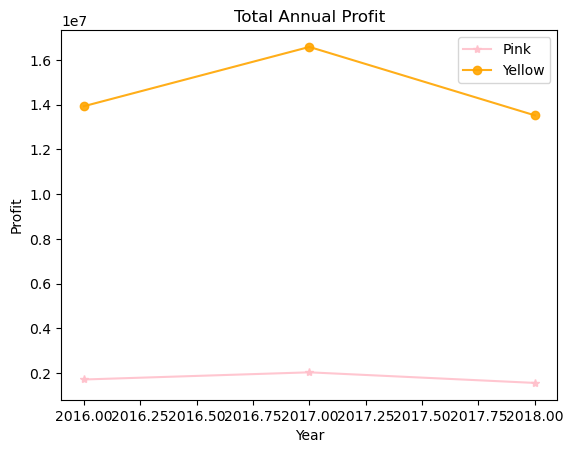

In [349]:
merged_df['profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
total_profit_per_yr = merged_df.groupby(['Year', 'Company'])['profit'].sum()
print(total_profit_per_yr)

temp = total_profit_per_yr.unstack()
total_profit_per_yr_pink = temp['Pink Cab'].values
total_profit_per_yr_yellow = temp['Yellow Cab'].values

plt.plot([2016, 2017, 2018],total_profit_per_yr_pink,'-*', alpha=0.9, color='pink',  label='Pink')
plt.plot([2016, 2017, 2018],total_profit_per_yr_yellow , '-o',alpha=0.9,color='orange', label='Yellow')
plt.title("Total Annual Profit")
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()
plt.show()

Customer retention rate rides>3

Yellow Cab had more returning customers

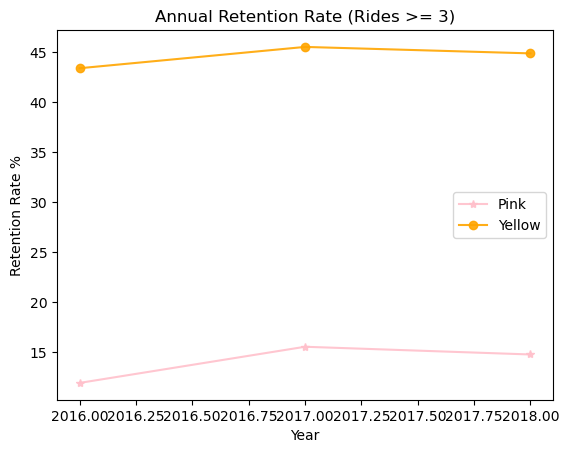

In [363]:
customer_counts = merged_df.groupby(['Company','Year','Customer ID'])['Customer ID'].size().reset_index(name='Frequency')
yearly_counts = customer_counts.groupby(['Company', 'Year'])['Frequency'].size().reset_index(name='Total Count')

threshold = 3

filtered_counts = customer_counts.loc[customer_counts['Frequency'] >= threshold]
num_ids = filtered_counts.groupby(['Year', 'Company'])['Customer ID'].nunique()

pink_2016 = 100*(num_ids[2016, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2016), 'Total Count'])
pink_2017 = 100*(num_ids[2017, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2017), 'Total Count'])
pink_2018 = 100*(num_ids[2018, 'Pink Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Pink Cab') & (yearly_counts['Year'] == 2018), 'Total Count'])

yellow_2016 = 100*(num_ids[2016, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2016), 'Total Count'])
yellow_2017 = 100*(num_ids[2017, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2017), 'Total Count'])
yellow_2018 = 100*(num_ids[2018, 'Yellow Cab']/yearly_counts.loc[(yearly_counts['Company'] == 'Yellow Cab') & (yearly_counts['Year'] == 2018), 'Total Count'])


plt.plot([2016, 2017, 2018],[pink_2016,pink_2017,pink_2018],'-*', alpha=0.9, color='pink',  label='Pink')
plt.plot([2016, 2017, 2018],[yellow_2016,yellow_2017,yellow_2018] , '-o',alpha=0.9,color='orange', label='Yellow')
plt.title(f"Annual Retention Rate (Rides >= {threshold})")
plt.xlabel('Year')
plt.ylabel('Retention Rate %')
plt.legend()
plt.show()

female pct With Duplicates

female prefers pink cab more

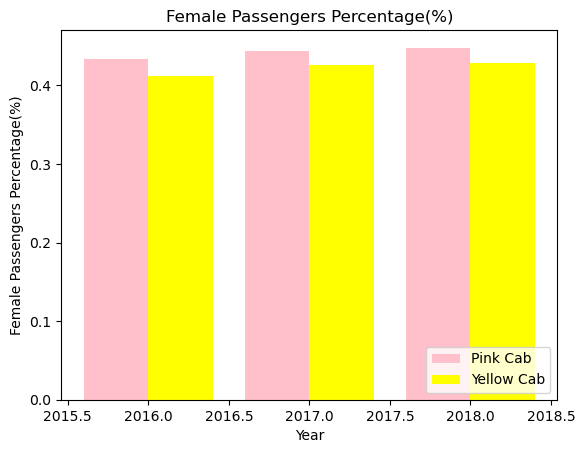

In [351]:
import matplotlib.pyplot as plt
import numpy as np

gender_counts = merged_df.groupby(['Company','Year','Gender'])['Gender'].size().reset_index(name='Gender Counts')
tot_passengers = gender_counts.groupby(['Company','Year'])['Gender Counts'].sum().reset_index(name='Total passengers')
gender_counts_tot = gender_counts.merge(tot_passengers, on=['Company', 'Year'])

gender_counts_tot['Gender Percentage'] = gender_counts_tot['Gender Counts'].div(gender_counts_tot['Total passengers'])

pink_gender_pct = gender_counts_tot.loc[(gender_counts_tot['Company']== 'Pink Cab'),'Gender Percentage'].values
yellow_gender_pct = gender_counts_tot.loc[(gender_counts_tot['Company']== 'Yellow Cab'),'Gender Percentage'].values

pink_male = []
pink_female = []
yellow_male = []
yellow_female = []
for i in range(len(pink_gender_pct)):
    if (i+1)%2==0:
        pink_male.append(pink_gender_pct[i])
        yellow_male.append(yellow_gender_pct[i])
    else:
        pink_female.append(pink_gender_pct[i])
        yellow_female.append(yellow_gender_pct[i])

year = np.array([2016,2017,2018])
plt.bar(year-0.2,pink_female, 0.4, color='pink',  label='Pink Cab')
plt.bar(year+0.2,yellow_female, 0.4, color='yellow',  label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Female Passengers Percentage(%)')
plt.title('Female Passengers Percentage(%)')
plt.legend(loc = 'lower right')
plt.show()

Female pct Without Duplicates

   Year     Company  total_passengers  female_passengers  percentage_female
0  2016    Pink Cab             16661               7354          44.139007
1  2016  Yellow Cab             25937              11520          44.415314
2  2017    Pink Cab             18643               8428          45.207316
3  2017  Yellow Cab             27789              12574          45.248120
4  2018    Pink Cab             18400               8352          45.391304
5  2018  Yellow Cab             27470              12422          45.220240


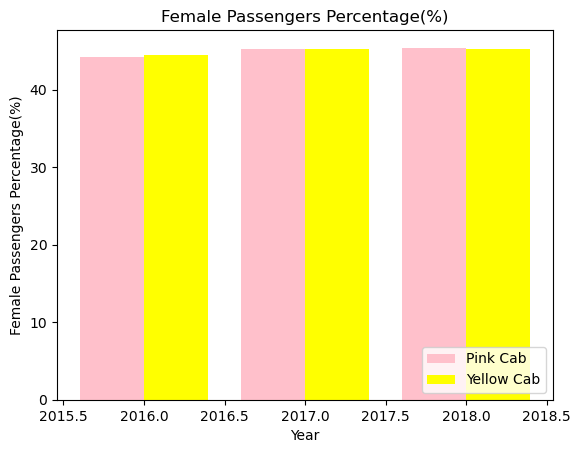

In [352]:
import pandas as pd


# remove duplicate rides for each customer
df_unique = merged_df.drop_duplicates(subset=['Year', 'Company', 'Customer ID'])

# calculate the total number of passengers for each year and cab company
total_passengers = df_unique.groupby(['Year', 'Company']).size().reset_index(name='total_passengers')

# calculate the number of female passengers for each year and cab company
female_passengers = df_unique[df_unique['Gender'] == 0].groupby(['Year', 'Company']).size().reset_index(name='female_passengers')

# merge the two dataframes
result = pd.merge(total_passengers, female_passengers, on=['Year', 'Company'])

# calculate the percentage of female passengers
result['percentage_female'] = result['female_passengers'] / result['total_passengers'] * 100

print(result)

pink = []
yellow = []
result = result['percentage_female'].values
for i in range(len(result)):
    if (i+1)%2==0:
        yellow.append(result[i])
    else:
        pink.append(result[i])

year = np.array([2016,2017,2018])
plt.bar(year-0.2,pink, 0.4, color='pink',  label='Pink Cab')
plt.bar(year+0.2,yellow, 0.4, color='yellow',  label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Female Passengers Percentage(%)')
plt.title('Female Passengers Percentage(%)')
plt.legend(loc = 'lower right')
plt.show()

% of users that are above 75% of annual average income

Pink cab users have slightly higher incomes on average

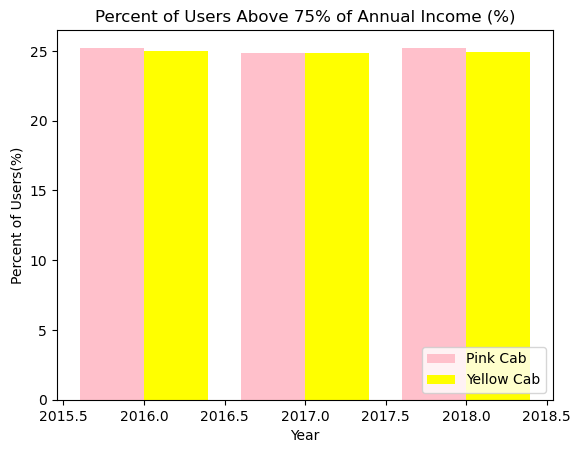

In [353]:
import matplotlib.pyplot as plt
import numpy as np

avg_income = {2016: 21013.0 , 2017: 21083.0, 2018: 20992 }

df = pd.merge(merged_df, pd.DataFrame(avg_income.items(), columns=['Year', 'us_avg_income']), on='Year')

filtered_df = df[df['Income (USD/Month)'] > df['us_avg_income']]

result_df = filtered_df.groupby(['Company', 'Year'])['Customer ID'].nunique().reset_index(name='Above users')
num_ids = merged_df.groupby(['Company','Year'])['Customer ID'].nunique().reset_index(name = 'Total users')

result_df = pd.merge(result_df, num_ids, on=['Company','Year'])
result_df['User Pct Above'] = 100*result_df['Above users'].div(result_df['Total users'])

# print(result_df)

# stats = merged_df.groupby(['Year'])['Income (USD/Month)'].describe()
# print(stats)

pct = result_df['User Pct Above'].values
pink_pct = pct[:3]
yellow_pct = pct[3:6]

year = np.array([2016,2017,2018])
plt.bar(year-0.2,pink_pct, 0.4, color='pink',  label='Pink Cab')
plt.bar(year+0.2,yellow_pct, 0.4, color='yellow',  label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Percent of Users(%)')
plt.title('Percent of Users Above 75% of Annual Income (%)')
plt.legend(loc = 'lower right')
plt.show()

pct rides that are below 30 yrs old

Pink Cab had slightly more rides that are by young users.

   Year     Company  total_rides  young_rides  percentage_young
0  2016    Pink Cab        25080         9705         38.696172
1  2016  Yellow Cab        82239        31605         38.430672
2  2017    Pink Cab        30321        11922         39.319284
3  2017  Yellow Cab        98189        38003         38.703928
4  2018    Pink Cab        29310        11340         38.689867
5  2018  Yellow Cab        94253        36292         38.504875


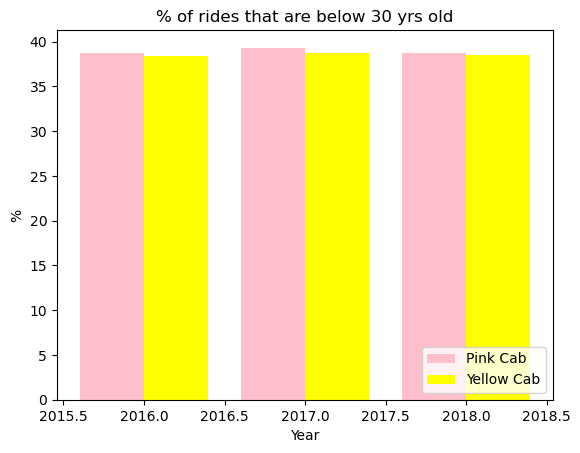

In [360]:
total_rides = merged_df.groupby(['Year', 'Company']).size().reset_index(name='total_rides')
young_rides = merged_df[merged_df['Age'] < 30].groupby(['Year', 'Company']).size().reset_index(name='young_rides')

result = pd.merge(total_rides, young_rides, on=['Year', 'Company'])
result['percentage_young'] = result['young_rides'] / result['total_rides'] * 100

print(result)

result = result['percentage_young'].values
yellow = []
pink = []
for i in range(len(result)):
    if (i+1)%2==0:
        yellow.append(result[i])
    else:
        pink.append(result[i])

year = np.array([2016,2017,2018])
plt.bar(year-0.2,pink, 0.4, color='pink',  label='Pink Cab')
plt.bar(year+0.2,yellow, 0.4, color='yellow',  label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('%')
plt.title('% of rides that are below 30 yrs old')
plt.legend(loc = 'lower right')
plt.show()


Total Number of Rides of every month

Pink and Yellow Cab have the same monthly trend

    Month     Company  total monthly rides
0       1    Pink Cab                 5057
1       1  Yellow Cab                18117
2       2    Pink Cab                 3375
3       2  Yellow Cab                14932
4       3    Pink Cab                 4223
5       3  Yellow Cab                17423
6       4    Pink Cab                 4083
7       4  Yellow Cab                17351
8       5    Pink Cab                 4960
9       5  Yellow Cab                18741
10      6    Pink Cab                 5877
11      6  Yellow Cab                18836
12      7    Pink Cab                 6590
13      7  Yellow Cab                21086
14      8    Pink Cab                 7739
15      8  Yellow Cab                23584
16      9    Pink Cab                 9658
17      9  Yellow Cab                27201
18     10    Pink Cab                10576
19     10  Yellow Cab                30276
20     11    Pink Cab                11005
21     11  Yellow Cab                31695
22     12  

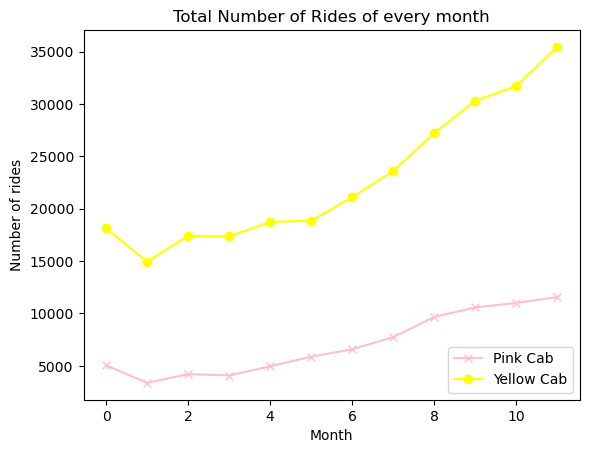

In [355]:
total_rides = merged_df.groupby(['Month', 'Company']).size().reset_index(name='total monthly rides')

print(total_rides)

total_rides = total_rides['total monthly rides'].values

yellow = []
pink = []
for i in range(len(total_rides)):
    if (i+1)%2==0:
        yellow.append(total_rides[i])
    else:
        pink.append(total_rides[i])

plt.plot(pink,'-x', color='pink',  label='Pink Cab')
plt.plot(yellow, '-o', color='yellow',  label='Yellow Cab')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Total Number of Rides of every month')
plt.legend(loc = 'lower right')
plt.show()